In [1]:
psrname='J1857+0943'

In [2]:
epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/'
einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNA/'+psrname+'/'

In [3]:
import os
dir_arr=[epta_dir,einpta_dir]
for index in range(len(dir_arr)):
    
    with os.scandir(dir_arr[index]) as entries:
            for entry in entries:
                dir_arr[index]=dir_arr[index]+entry.name+'/ptmcmc/'
epta_dir=dir_arr[0]
einpta_dir=dir_arr[1]

In [4]:
epta_dir

'/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/J1857+0943/TM_WN_DM10/ptmcmc/'

In [5]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir/')
from diff_chain import  Diff_chain_shift

2023-04-16 02:35:57.485917: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 02:35:57.536172: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 02:35:57.537180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 02:35:58.452821: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
par_epta_spna=pd.read_csv(epta_dir+'pars.txt', header = None)
lep=len(par_epta_spna)
#par_epta_spna

In [7]:
epta_spna_1=np.loadtxt(epta_dir+'chain_1.txt',usecols=(lep-1,lep-2,-3))

In [8]:
par_einpta_spna=pd.read_csv(einpta_dir+'pars.txt', header = None)
leinp=len(par_einpta_spna)
#par_einpta_spna

In [9]:
einpta_spna_1=np.loadtxt(einpta_dir+'chain_1.txt',usecols=(leinp-1,leinp-2,-3))

In [10]:
epta_spna_arr_dm=epta_spna_1.T[0:2];einpta_spna_arr_dm=einpta_spna_1.T[0:2]

In [11]:
loglike_spna_epta=epta_spna_1.T[-1];loglike_spna_einpta=einpta_spna_1.T[-1]

# Tension considering dm noise only

In [12]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

In [13]:
epta_dm=MCSamples(samples=np.array(epta_spna_arr_dm).transpose(),loglikes=loglike_spna_epta,names=names_dm,labels=labels_dm,label='EPTA')
einpta_dm=MCSamples(samples=np.array(einpta_spna_arr_dm).transpose(),loglikes=loglike_spna_einpta,names = names_dm,labels=labels_dm,label='EPTA+INPTA \n'+psrname)

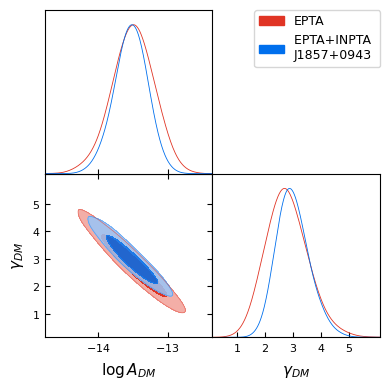

In [14]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_dm,einpta_dm], filled=True)
plt.savefig(psrname+'_EPTAvsEINPTA_SPNA_DM.png',dpi=300)
plt.show()

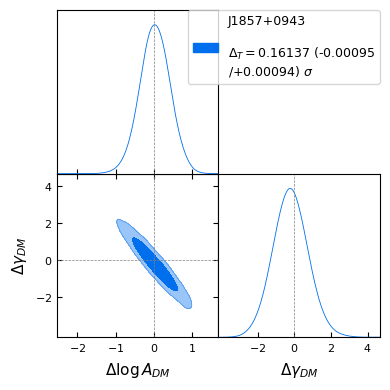

In [15]:
%matplotlib inline
diff_chain_dm, nsig_dm,sigl_dm,sigu_dm=Diff_chain_shift(epta_dm,einpta_dm)

g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.5f}".format(nsig_dm))+' (-'+str("{:.5f}".format(sigu_dm-nsig_dm))
                        +'\n/+'+str("{:.5f}".format(nsig_dm-sigl_dm))+') $\sigma$'],markers=[0,0,0,0])

plt.savefig(psrname+'diff_EPTAvsEINPTA_SPNA_dm.png',dpi=300)